In [1]:
import os
%pwd

u'/Users/Driz/data_sci_wk3'

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
housing = pd.read_csv('../DSI-CHI-1/lessons/week-08/2.2-linear-regression-with-bayes/assets/datasets//housing.csv', index_col=0)
housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
import pymc3 as pm

In [5]:
# wont work with pandas, must put into dict (dont get hung up on this. scipy will do this easily)

housing_dict = dict(MEDV=housing['MEDV'].values, 
                    CRIM=housing['CRIM'].values)

In [6]:
# predictor is MEDV I want to predict it with CRIM (can have multiple predictors)

with pm.Model() as model:
    pm.glm.glm('MEDV ~ CRIM', housing_dict)
    start = pm.find_MAP() # Find starting value by optimization
    step = pm.NUTS(scaling=start) # Instantiate MCMC sampling algorithm how we do Marchov Chain
    trace = pm.sample(2000, step, progressbar=True) # draw 2000 posterior samples using NUTS sampling

100%|██████████| 2000/2000 [00:01<00:00, 1535.98it/s]


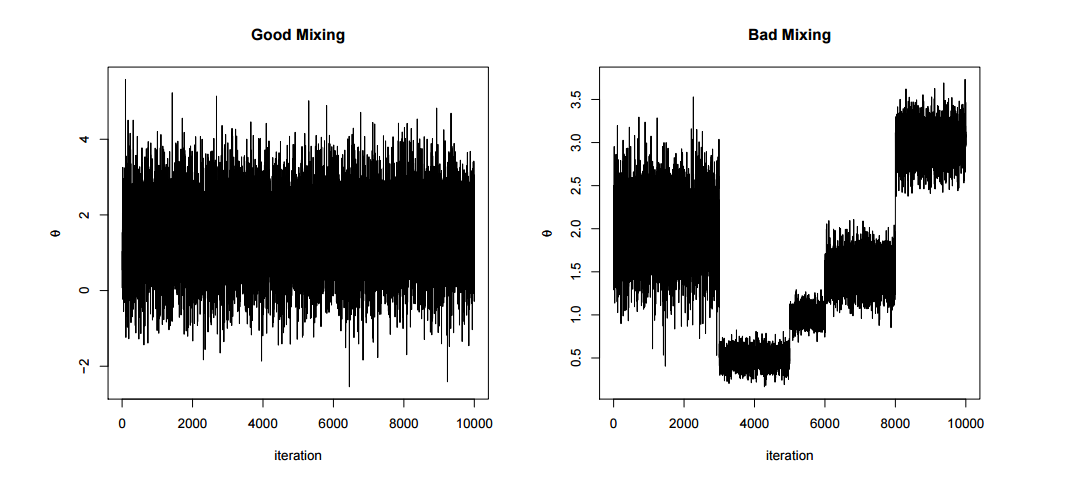

In [7]:
from IPython.display import Image
Image('../DSI-CHI-1/lessons/week-08/2.2-linear-regression-with-bayes/assets/images/traceplot examples.PNG')


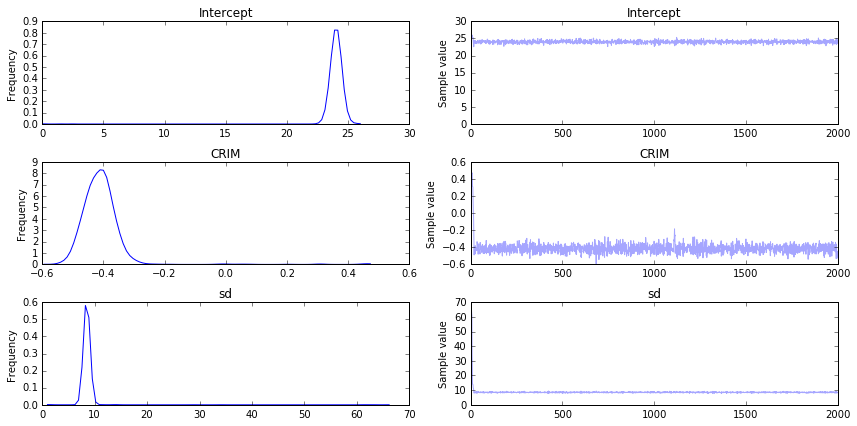

In [8]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout()

# visual representation of 2,000 models
# we dont have just one value, we have 2,000 different models. we are interested in the range of possibilites.

In [9]:
# 

pm.summary(trace)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  23.980           1.109            0.041            [23.232, 24.838]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  23.209         23.760         24.024         24.293         24.824


CRIM:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.409           0.077            0.006            [-0.505, -0.330]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.497         -0.445         -0.413         -0.385         -0.311


sd:

  Mean             SD               MC Error         95% HPD interval
  -------------------

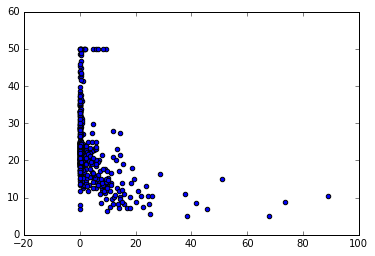

In [10]:
# Output the data to get a view of the regular data

plt.scatter(housing['CRIM'], housing['MEDV'])

(-5, 100)

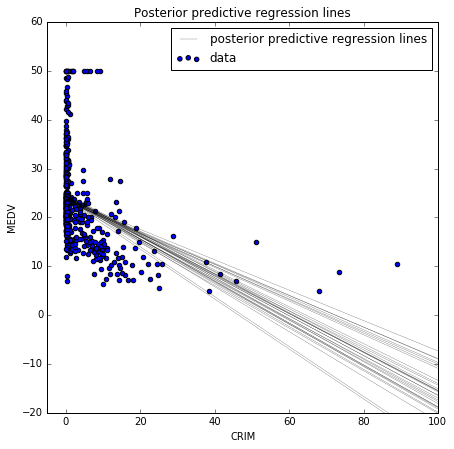

In [11]:
# 100 times per model this will go in and see what happens when dict of values is fed in (all those things we found, this is how they relate to eachother)

lm = lambda x, samp: samp['Intercept'] + samp['CRIM'] * x

plt.figure(figsize=(7, 7))
pm.glm.plot_posterior_predictive(trace, 
                                 eval=np.linspace(100, 0), # what to map the lines to (in this case, 0-100)
                                 lm=lm, # How to model the the findings -- add intercept and 'CRIM' * x for each of the 2000 runthroughs
                                 label='posterior predictive regression lines')
plt.scatter(housing['CRIM'], housing['MEDV'], label='data')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.ylim(-20,60)
plt.xlim(-5, 100)

Above shows output of every one of regression lines. For every line what is the y I get when I feed 0 into it, based on coefficient and so on. Creates different intercept and coefficient for each run. 

In [12]:
housing.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'],
      dtype='object')

In [13]:
housing_dict = dict(MEDV=housing['MEDV'].values, 
                    CRIM=housing['CRIM'].values,
                   NOX=housing['NOX'].values,
                   LSTAT=housing['LSTAT'].values)

In [14]:
with pm.Model() as model:
    pm.glm.glm('MEDV ~ CRIM + NOX + LSTAT', housing_dict)
    start = pm.find_MAP() # Find starting value by optimization
    step = pm.NUTS(scaling=start) # Instantiate MCMC sampling algorithm how we do Marchov Chain
    trace_bigger_model = pm.sample(2000, step, progressbar=True) # draw 2000 posterior samples using NUTS sampling

100%|██████████| 2000/2000 [00:04<00:00, 491.46it/s]


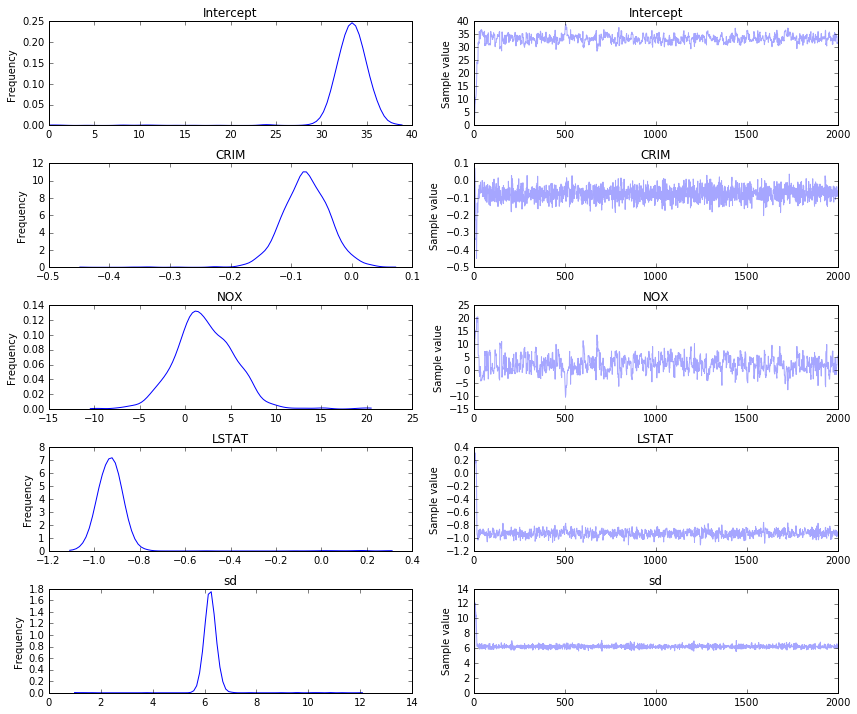

In [15]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace_bigger_model)
plt.tight_layout()

In [16]:
pm.summary(trace_bigger_model)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  33.149           2.855            0.241            [30.526, 36.480]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  30.229         32.340         33.358         34.355         36.297


CRIM:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.076           0.040            0.001            [-0.150, 0.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.151         -0.100         -0.076         -0.050         0.000


NOX:

  Mean             SD               MC Error         95% HPD interval
  --------------------

In [17]:
housing['NOX'].mean()

0.5546950592885372

In [18]:
housing['LSTAT'].mean()

12.653063241106723

(-5, 100)

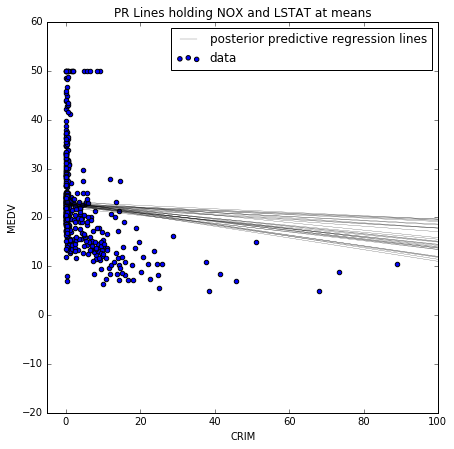

In [19]:
lm = lambda x, samp: samp['Intercept'] + samp['CRIM'] * x + samp['NOX'] * housing['NOX'].mean() + samp['LSTAT'] * housing['LSTAT'].mean()

plt.figure(figsize=(7, 7))
pm.glm.plot_posterior_predictive(trace_bigger_model, 
                                 eval=np.linspace(100, 0), # what to map the lines to (in this case, 0-100)
                                 lm=lm, # How to model the the findings -- add intercept and 'CRIM' * x for each of the 2000 runthroughs
                                 label='posterior predictive regression lines')
plt.scatter(housing['CRIM'], housing['MEDV'], label='data')

plt.title('PR Lines holding NOX and LSTAT at means')
plt.legend(loc=0)
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.ylim(-20,60)
plt.xlim(-5, 100)

In [20]:
%pwd

u'/Users/Driz/data_sci_wk3'